<a id='Model_Building'></a>
## Model Building

As this is classification problem. So, we can apply following algorithms.
* Logistic Regression
* Random Forest
* Support Vector Machine
* K Nearest Neighbour

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('dataset/final_data.csv', index_col = 'issue_d')

In [3]:
df.head()

,inq_last_6mths,recoveries,annual_inc,loan_amnt,int_rate,emp_length,out_prncp,total_pymnt,collection_recovery_fee,default_ind,...,sub_grade_G5,home_ownership_Other,home_ownership_Own,home_ownership_Rent,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_other,pub_rec_Good,initial_list_status_w
issue_d,,,,,,,,,,,,,,,,,,,,,
2007-06-01,0,0.0,22000.0,7500.0,13.75,1,0.0,9194.98,0.0,0,...,0,0,1,0,0,0,1,0,1,0
2007-07-01,0,0.0,150000.0,5000.0,7.43,8,0.0,5174.17,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2007-07-01,0,0.0,125000.0,5750.0,7.43,10,0.0,6421.50,0.0,0,...,0,0,0,0,0,0,1,0,1,0
2007-07-01,2,0.0,40000.0,5000.0,7.43,6,0.0,5593.39,0.0,0,...,0,0,0,1,0,0,0,0,1,0
2007-07-01,2,0.0,20000.0,1200.0,11.54,1,0.0,1425.37,0.0,0,...,0,0,0,1,0,1,0,0,1,0


In [4]:
# Deviding Dataset into x and y
y = df['default_ind']
x = df.drop('default_ind', axis=1)

## Train Test Split

We are using 'issue_d' column to divide the data into train and test split.

* Train Data will consists => June 2007 - May 2015
* Test Data will consists => June 2015 - Dec 2015

REF : https://stackoverflow.com/questions/37532098/split-dataframe-into-two-on-the-basis-of-date

In [5]:
# Splitting Dataframe according to Date as given in problem statement
train_dataset = df['2007-06-01':'2015-05-1']
test_dataset = df['2015-05-1':]
print('Train Dataset:',train_dataset.shape)
print('Test Dataset:',test_dataset.shape)

Train Dataset: (598978, 54)
Test Dataset: (256991, 54)


In [8]:
# Devide Dataset into Train and Test
x_train, x_test, y_train, y_test = train_dataset[x.columns] , test_dataset[x.columns] , train_dataset['default_ind'] , test_dataset['default_ind']
print("Dataset with Shape :\nx_train ",x_train.shape,"\ny_train ",y_train.shape ,"\nx_test ",x_test.shape, "\ny_test ",y_test.shape)

Dataset with Shape :
x_train  (598978, 53) 
y_train  (598978,) 
x_test  (256991, 53) 
y_test  (256991,)


# Checking Dataset Balance Records

We are checking total number of records for both classes. If we generate model with imbalance dataset then model will be bias and there is a possibilty that we will get very good accuracy but biasness can be present and ot will affect prediction.

In [9]:
train_dataset.default_ind.value_counts()

0    552822
1     46156
Name: default_ind, dtype: int64

As we can see this datset is not a valid or balance dataset.So, we can not use this for model building process. Before model building process we need to balance the dataset. We are using <b>SMOTE - Synthetic Minority Over-sampling Technique</b> technique for balancing dataset.

In [10]:
from imblearn.over_sampling import SMOTE 

In [14]:
smt = SMOTE(random_state = 37) 
x_train_res, y_train_res = smt.fit_sample(x_train, y_train.ravel())

In [15]:
# Libraries for Validation of models
from sklearn.metrics import confusion_matrix

## Logistic Regression

In [19]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(solver='lbfgs').fit(x_train_res,y_train_res)
logistic_predict = logistic_model.predict(x_test)

In [20]:
# Checking Accuracy
logistic_conusion_matrix = confusion_matrix(y_test,logistic_predict)
logistic_conusion_matrix

array([[240525,  16155],
       [    51,    260]], dtype=int64)

## Random Forest

In [21]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 100, criterion='gini')
rf_model = rf_model.fit(x_train_res, y_train_res)
rf_model_predict = rf_model.predict(x_test)

In [22]:
# Checking Accuracy
rf_conusion_matrix = confusion_matrix(y_test,rf_model_predict)
rf_conusion_matrix

array([[231686,  24994],
       [    45,    266]], dtype=int64)

## KNN - K Nearest Neighbour

In [23]:
# KNN - K Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model = knn_model.fit(x_train_res,y_train_res)
knn_predict = knn_model.predict(x_test)

In [24]:
# Checking Accuracy
knn_conusion_matrix = confusion_matrix(y_test,knn_predict)
knn_conusion_matrix

array([[195577,  61103],
       [    40,    271]], dtype=int64)

In [25]:
# Choosing a K Value with Elbow method
error_rate = []
k_list = [3,7,9,11,13,15,17,19,21,23,25,27,29]
for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_res,y_train_res)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [26]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Error Rate')

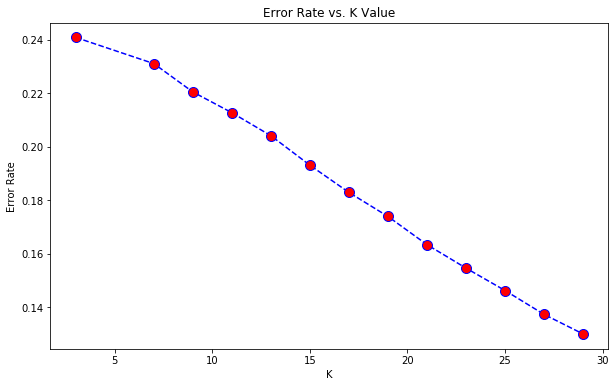

In [27]:
plt.figure(figsize=(10,6))
plt.plot(k_list,error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [31]:
knn_model2 = KNeighborsClassifier(n_neighbors=29)
knn_model2 = knn_model.fit(x_train_res,y_train_res)

In [32]:
knn_predict2 = knn_model2.predict(x_test)

In [33]:
# Checking Accuracy
knn_conusion_matrix2 = confusion_matrix(y_test,knn_predict2)
knn_conusion_matrix2

array([[195577,  61103],
       [    40,    271]], dtype=int64)

<a id='Model_Evaluation'></a>
## Model Evaluation

* Confusion Matrix
* Accuracy
* Precision
* Recall
* F1 Score

### Method for Report Generation

In [40]:
# Report All Results into Dataframe - Creating Method Where Evaluation Parameters will generate from Concusion Matrix
report_comments, report_Accuracy, report_Precision, report_Recall , report_F1_Score= [],[],[],[],[]

def report_generate(conf_mat,comment):

    # Append Comment into List
    report_comments.append(comment)

    # Calculating Accuracy and Append into List
    accuracy = (conf_mat[1][1] + conf_mat[0][0])/ (conf_mat[1][1] + conf_mat[0][0] + conf_mat[0][1] + conf_mat[1][0])
    report_Accuracy.append(accuracy)
    
    # Calculating Precision and Append into List
    precisoin = (conf_mat[0][0])/(conf_mat[0][1] + conf_mat[0][0])
    report_Precision.append(precisoin)
    
    # Calculating Recall and Append into List
    recall = (conf_mat[0][0])/(conf_mat[1][0] + conf_mat[0][0])
    report_Recall.append(recall)
    
    # Calculating F1-Score and Append into List
    f1scrore = 2 * precisoin * recall / (precisoin + recall) 
    report_F1_Score.append(f1scrore)

In [35]:
# Report All Results into Dataframe
def show_report():
    report_data = {'Comment': report_comments,
               'Accuracy': report_Accuracy,
               'Precision': report_Precision,
               'Recall': report_Recall ,
               'F1 Score': report_F1_Score
              }
    df_results = pd.DataFrame.from_dict(report_data)
    return(df_results)

# Final Report

In [41]:
# Pass all Generated Confusion Matrix for generate report
report_generate(logistic_conusion_matrix, comment='After SMOTE Logistic Regression')
report_generate(knn_conusion_matrix, comment='After SMOTE KNN for K = 3')
report_generate(rf_conusion_matrix, comment='After SMOTE Random Forest')

In [42]:
show_report()

,Comment,Accuracy,Precision,Recall,F1 Score
0,After SMOTE Logistic Regression,0.936939,0.937062,0.999788,0.967409
1,After SMOTE KNN for K = 3,0.762081,0.761949,0.999796,0.864817
2,After SMOTE Random Forest,0.902569,0.902626,0.999806,0.948734


<a id='conclusion'></a>
## Conclusion

With references of the above models and model evaluations we can say that <b>Logistic Regression model</b> is giving the best solution for the given 
problem.